In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D, rcParams
import re
import datetime as dt
%matplotlib inline

In [10]:
df = pd.read_csv(r'datasets\reclame_aqui_completo_ambev_v2.csv', parse_dates=['date', 'time_answer', 'time_client'])

In [11]:
df.head()

,date,uf,city,title,coment,answer,time_answer,coment_client_text,time_client,resolved,business,assessment
0,2021-07-27 00:45:00,AL,Maceió,Quero fazer acordo,Fiz uma compra em seguida acabei fechando e nã...,"Olá Alame,Enviamos as orientações de seu caso ...",2021-07-29 13:06:00,Muito satisfatório,2021-07-29 13:21:00,Resolvido,Sim,8
1,2021-07-26 16:52:00,SP,São Paulo,Estou sendo perseguido pela logística do cdd d...,Ha oito meses estou sendo perseguido pela logí...,"Olá Alexandre,Informamos que encaminhamos o se...",2021-07-27 11:27:00,Pessimo,2021-07-27 11:30:00,Não resolvido,Não,0
2,2021-07-26 16:27:00,RJ,Armação de Búzios,Código cliente,"Realizei o cadastro no app e já faz dias, não ...","Olá Adriana,Conforme conversamos, o sistema nã...",2021-07-28 13:28:00,Fui muito bem atendida e orientada. O represen...,2021-07-28 17:39:00,Resolvido,Sim,10
3,2021-07-26 15:15:00,SP,Cotia,Não aumentam prazo do boleto,"Deixo aqui, minha grande insatisfação com AMBE...","Olá Tadeu,Informamos que encaminhamos seu caso...",2021-07-27 11:04:00,"Vocês não trabalham com verdade, meu score no ...",2021-07-27 15:59:00,Não resolvido,Não,0
4,2021-07-24 23:01:00,SC,CAMBORIU,Equipamento,Aguardando equipamento para meu comercio desde...,"Olá, William.Informamos que sua solicitação fo...",2021-07-26 12:13:00,9,2021-07-27 23:45:00,Não resolvido,Não,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1010 non-null   datetime64[ns]
 1   uf                  1010 non-null   object        
 2   city                1010 non-null   object        
 3   title               1010 non-null   object        
 4   coment              1010 non-null   object        
 5   answer              1001 non-null   object        
 6   time_answer         1001 non-null   datetime64[ns]
 7   coment_client_text  1010 non-null   object        
 8   time_client         1010 non-null   datetime64[ns]
 9   resolved            1010 non-null   object        
 10  business            1010 non-null   object        
 11  assessment          1010 non-null   int64         
dtypes: datetime64[ns](3), int64(1), object(8)
memory usage: 94.8+ KB


In [13]:
df.describe(datetime_is_numeric=True, include='all')

,date,uf,city,title,coment,answer,time_answer,coment_client_text,time_client,resolved,business,assessment
count,1010,1010,1010,1010,1010,1001,1001,1010,1010,1010,1010,1010.000000
unique,NaN,27,329,914,1007,967,NaN,883,NaN,2,2,NaN
top,NaN,SP,São Paulo,Cadastro bloqueado,SOLICITEI TROCA ENDEREÇO ATE HOJE NAO OBTIVE U...,"Olá Jessica,Conforme conversamos, seu cadastro...",NaN,Bom,NaN,Resolvido,Sim,NaN
freq,NaN,366,140,8,2,5,NaN,33,NaN,789,811,NaN
mean,2020-12-05 23:34:30.178217728,NaN,NaN,NaN,NaN,NaN,2020-12-17 17:39:24.815184384,NaN,2021-01-05 05:17:08.435644928,NaN,NaN,6.700000
min,2020-04-27 17:24:00,NaN,NaN,NaN,NaN,NaN,2020-04-28 10:58:00,NaN,2020-05-01 13:07:00,NaN,NaN,0.000000
25%,2020-09-11 14:35:45,NaN,NaN,NaN,NaN,NaN,2020-09-22 16:00:00,NaN,2020-10-05 13:32:15,NaN,NaN,5.000000
50%,2020-12-03 18:14:00,NaN,NaN,NaN,NaN,NaN,2020-12-15 14:14:00,NaN,2021-01-04 13:28:00,NaN,NaN,8.000000
75%,2021-03-02 05:48:00,NaN,NaN,NaN,NaN,NaN,2021-03-12 11:49:00,NaN,2021-04-09 16:07:45,NaN,NaN,10.000000
max,2021-07-27 00:45:00,NaN,NaN,NaN,NaN,NaN,2021-07-29 13:20:00,NaN,2021-07-30 10:13:00,NaN,NaN,10.000000


### Criando novas colunas

In [14]:
df['month'] = df['date'].dt.month

In [15]:
df['year'] = df['date'].dt.year

In [16]:
df['month_year'] = f"{df['date'].dt.month}-{df['date'].dt.year}"

In [17]:
df['time_to_reply'] = ((df['time_answer'] - df['date']).dt.days).sort_values(ascending=False)

### Explorando Cidades e Estados

- Top 10 cidades com mais reclamações

In [18]:
df['city'].value_counts()

São Paulo         140
Rio de Janeiro     71
Belo Horizonte     49
Brasília           25
Recife             18
                 ... 
Blumenau            1
Mesquita            1
Mineiros            1
Varginha            1
Muriaé              1
Name: city, Length: 329, dtype: int64

Text(0.5, 1.0, 'Top 10 cidades com mais reclamações')

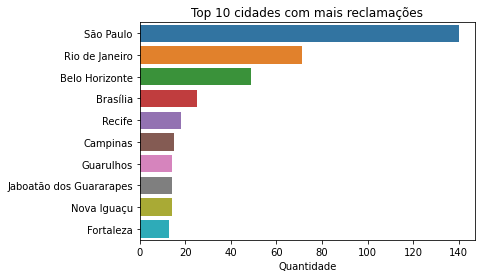

In [19]:
sns.barplot(data=df.groupby('city')['assessment'].count().reset_index().sort_values(by='assessment', ascending=False)[:10], y="city", x='assessment')
plt.ylabel('')
plt.xlabel('Quantidade')
plt.title('Top 10 cidades com mais reclamações')

- Top 10 estados com mais reclamações

In [20]:
df['uf'].value_counts()

SP    366
RJ    156
MG    116
PE     58
BA     42
RS     27
PR     26
DF     25
SC     23
CE     20
GO     20
PA     18
MT     18
PB     17
ES     15
MA     14
AM     11
RN      8
MS      8
AL      5
PI      5
AC      3
SE      3
RO      2
TO      2
RR      1
AP      1
Name: uf, dtype: int64

Text(0.5, 1.0, 'Top 10 estados com mais reclamações')

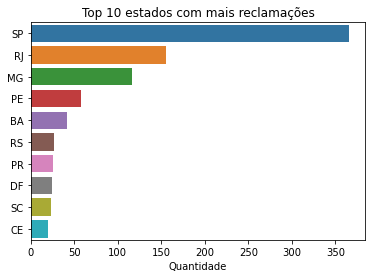

In [21]:
sns.barplot(data=df.groupby('uf')['assessment'].count().reset_index().sort_values(by='assessment', ascending=False)[:10], y="uf", x='assessment')
plt.ylabel('')
plt.xlabel('Quantidade')
plt.title('Top 10 estados com mais reclamações')

- Correlação entre estados e notas

In [22]:
df['assessment'].value_counts(normalize=True)

10    0.366337
0     0.157426
8     0.115842
9     0.078218
7     0.075248
5     0.068317
6     0.055446
1     0.022772
3     0.021782
4     0.019802
2     0.018812
Name: assessment, dtype: float64

<Figure size 720x432 with 0 Axes>

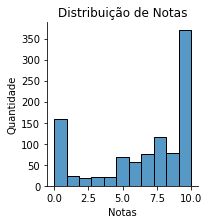

In [57]:
plt.figure(figsize=(10,6))
sns.displot(
    df, x="assessment",
    height=3, facet_kws=dict(margin_titles=True),
    kind="hist",
    bins=11
)
plt.ylabel('Quantidade')
plt.xlabel('Notas')
plt.title('Distribuição de Notas')
plt.show()

In [ ]:
for state in df['uf'].unique():
    plt.figure(figsize=(10,4))
    sns.barplot(data=y,
                x='index',
                y='Frequency',
                palette='flare')
    plt.y xlim(0 , 10)

    plt.ylabel('Quantidade')
    plt.xlabel('Notas')
    plt.title(state)
    plt.show()

<Figure size 720x288 with 0 Axes>

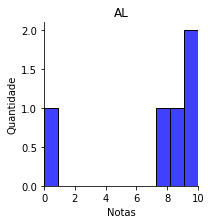

<Figure size 720x288 with 0 Axes>

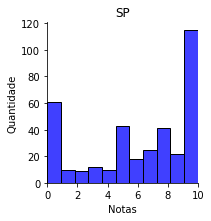

<Figure size 720x288 with 0 Axes>

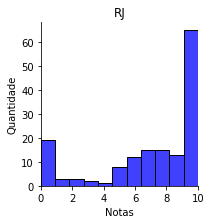

<Figure size 720x288 with 0 Axes>

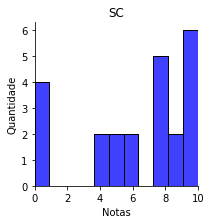

<Figure size 720x288 with 0 Axes>

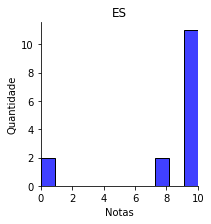

<Figure size 720x288 with 0 Axes>

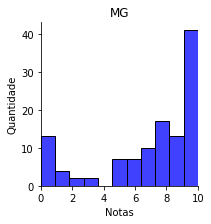

<Figure size 720x288 with 0 Axes>

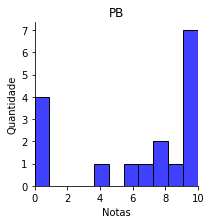

<Figure size 720x288 with 0 Axes>

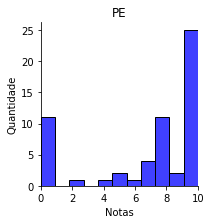

<Figure size 720x288 with 0 Axes>

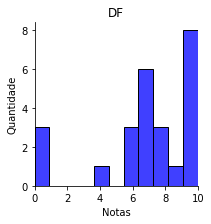

<Figure size 720x288 with 0 Axes>

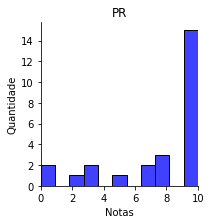

<Figure size 720x288 with 0 Axes>

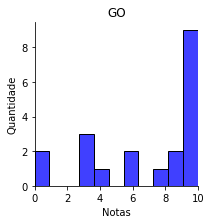

<Figure size 720x288 with 0 Axes>

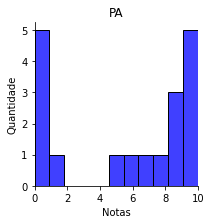

<Figure size 720x288 with 0 Axes>

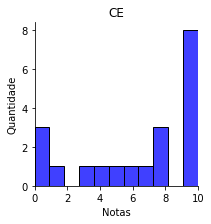

<Figure size 720x288 with 0 Axes>

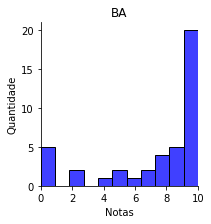

<Figure size 720x288 with 0 Axes>

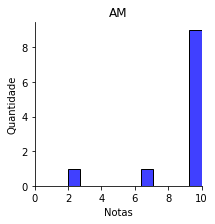

<Figure size 720x288 with 0 Axes>

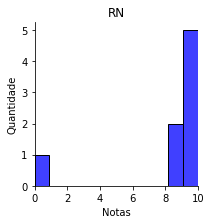

<Figure size 720x288 with 0 Axes>

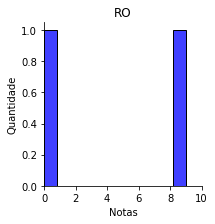

<Figure size 720x288 with 0 Axes>

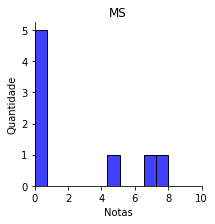

<Figure size 720x288 with 0 Axes>

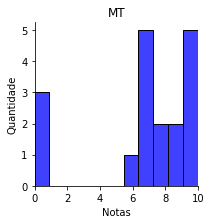

<Figure size 720x288 with 0 Axes>

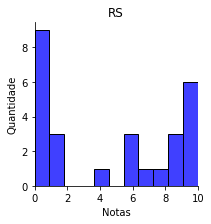

<Figure size 720x288 with 0 Axes>

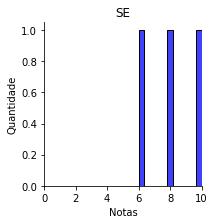

<Figure size 720x288 with 0 Axes>

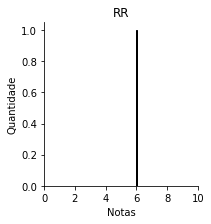

<Figure size 720x288 with 0 Axes>

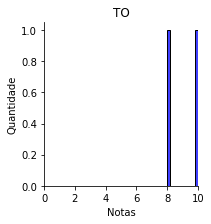

<Figure size 720x288 with 0 Axes>

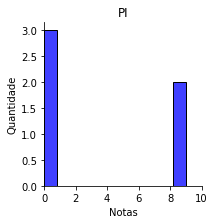

<Figure size 720x288 with 0 Axes>

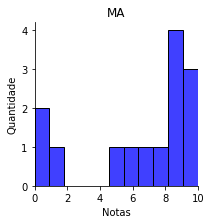

<Figure size 720x288 with 0 Axes>

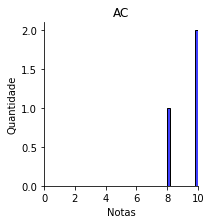

<Figure size 720x288 with 0 Axes>

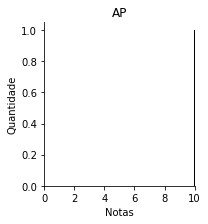

In [75]:
for state in df['uf'].unique():
    plt.figure(figsize=(10,4))
    sns.displot(df.loc[df['uf'] == state],
                color='blue',
                x="assessment",
                height=3, facet_kws=dict(margin_titles=True),
                kind="hist",
                bins=11)
    
    plt.xlim(0 , 10)

    plt.ylabel('Quantidade')
    plt.xlabel('Notas')
    plt.title(state)
    plt.show()

### Tempo de Resposta (em dias)

In [25]:
df['time_to_reply'].describe()

count    1001.000000
mean       10.527473
std        12.285744
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max       101.000000
Name: time_to_reply, dtype: float64

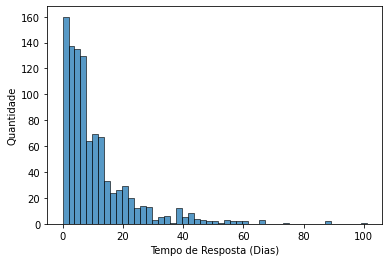

In [26]:
sns.histplot(data = df,  x='time_to_reply')
plt.xlabel('Tempo de Resposta (Dias)')
plt.ylabel('Quantidade')
plt.show()

In [27]:
months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho"]

In [28]:
def change_name(x):
    if x == 1:
        resp = 'Janeiro'
        return resp
    if x == 2:
        resp = 'Fevereiro'
        return resp
    if x == 3:
        resp = 'Março'
        return resp
    if x == 4:
        resp = 'Abril'
        return resp
    if x == 5:
        resp = 'Maio'
        return resp
    if x == 6:
        resp = 'Junho'
        return resp

In [29]:
df['month'] = df['month'].apply(lambda x: change_name(x))

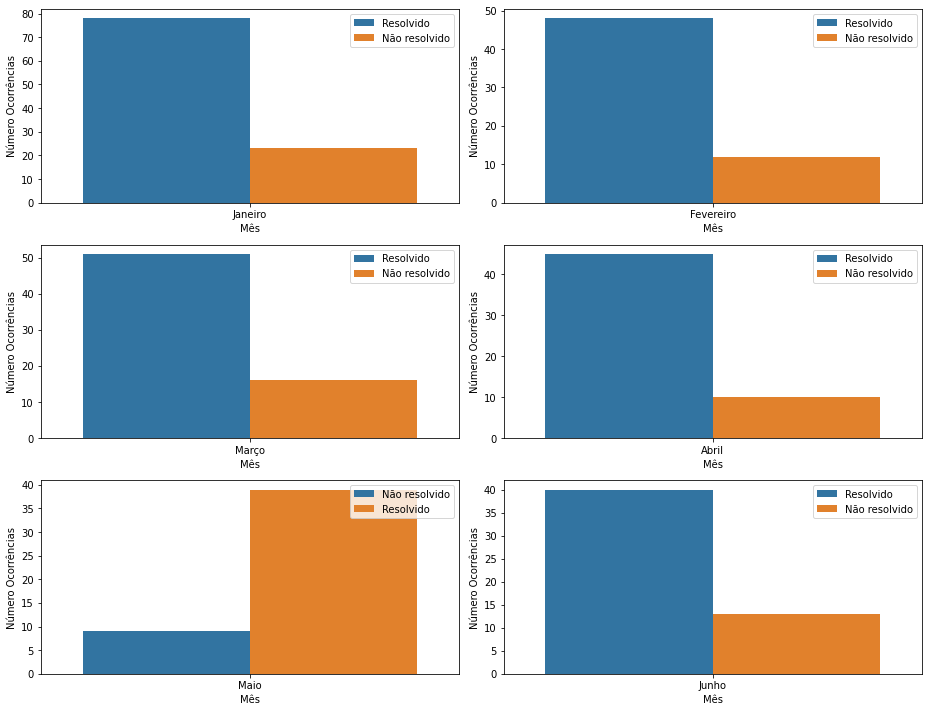

In [30]:
fig, axs = plt.subplots(3, 2, figsize=(13, 10))
aux = 0
for i in range(0,3):
    for j in range(0,2):
        sns.countplot(x='month', hue = 'resolved', data=df.loc[(df['year'] == 2021)&(df['month'] == months[aux])], ax=axs[i][j])
        axs[i][j].legend(loc="upper right")
        axs[i][j].set_xlabel('Mês')
        axs[i][j].set_ylabel('Número Ocorrências')
        aux +=1
plt.tight_layout()

In [31]:
mean = df.groupby('month')['time_to_reply'].mean().rename('mean_time')
median = df.groupby('month')['time_to_reply'].median().rename('median_time')

In [32]:
mean.index = pd.CategoricalIndex(mean.index, categories=months, ordered=True)
median.index = pd.CategoricalIndex(median.index, categories=months, ordered=True)

In [33]:
mean.index = mean.index.sort_values()
median.index = median.index.sort_values()

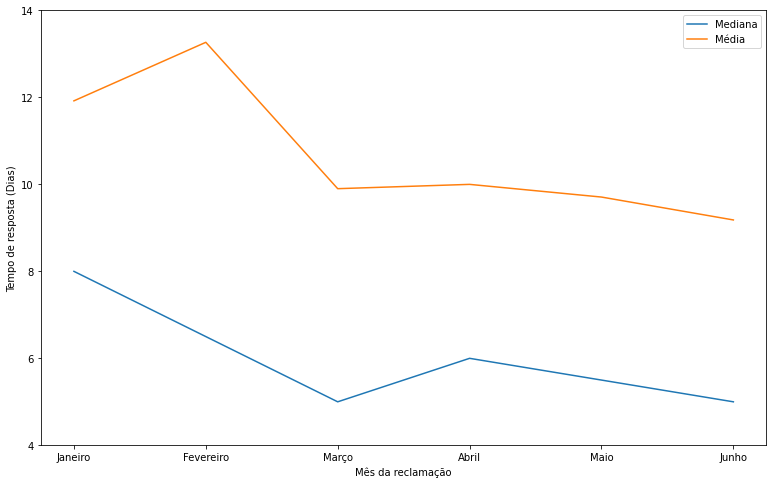

In [34]:
fig, ax = plt.subplots(figsize=(13,8))
ax = median.plot(legend = True, label='Mediana')
ax = mean.plot(legend = True, label='Média')
ax.set_ylim([4,14])
ax.set_xlabel('Mês da reclamação')
ax.set_ylabel('Tempo de resposta (Dias)')
plt.show()

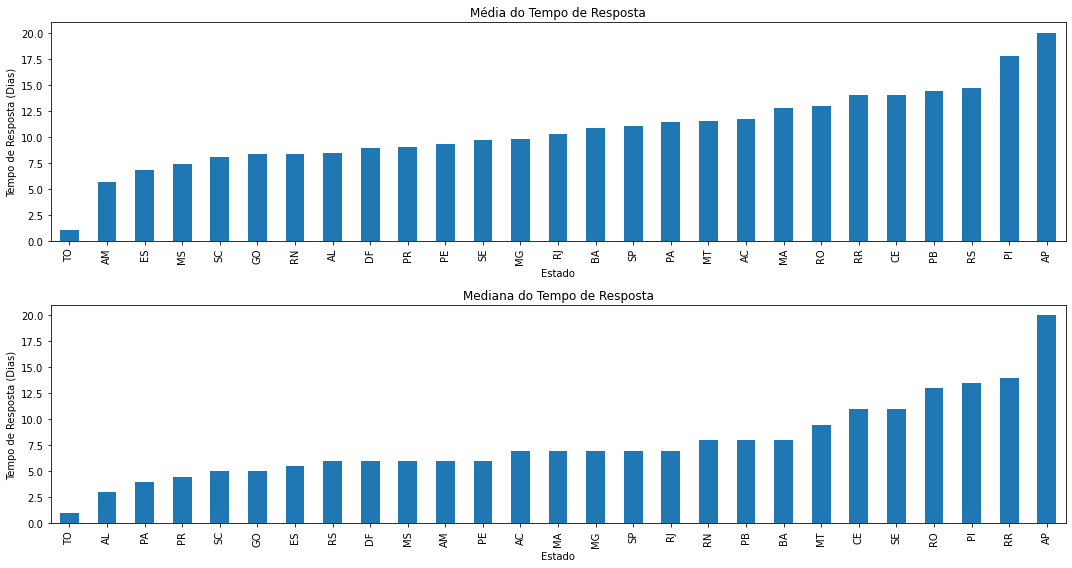

In [35]:
fig, ax = plt.subplots(2, figsize=(15,8))
df.groupby('uf')['time_to_reply'].mean().sort_values().plot(kind='bar', ax=ax[0], title='Média do Tempo de Resposta')
df.groupby('uf')['time_to_reply'].median().sort_values().plot(kind='bar', ax=ax[1], title='Mediana do Tempo de Resposta')
ax[0].set_xlabel('Estado')
ax[0].set_ylabel('Tempo de Resposta (Dias)')
ax[1].set_xlabel('Estado')
ax[1].set_ylabel('Tempo de Resposta (Dias)')
plt.tight_layout()
plt.show()

In [36]:
df[['assessment', 'time_to_reply']].corr()

,assessment,time_to_reply
assessment,1.000000,-0.089547
time_to_reply,-0.089547,1.000000


### Horário de reclamação

<AxesSubplot:>

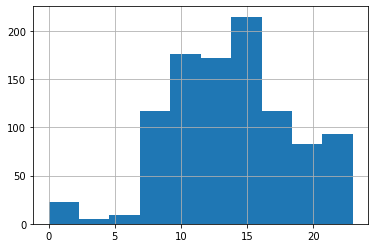

In [37]:
df['date'].dt.hour.hist()

### Status da reclamação

In [38]:
df['resolved'].value_counts()

Resolvido        789
Não resolvido    221
Name: resolved, dtype: int64

<AxesSubplot:xlabel='assessment', ylabel='Count'>

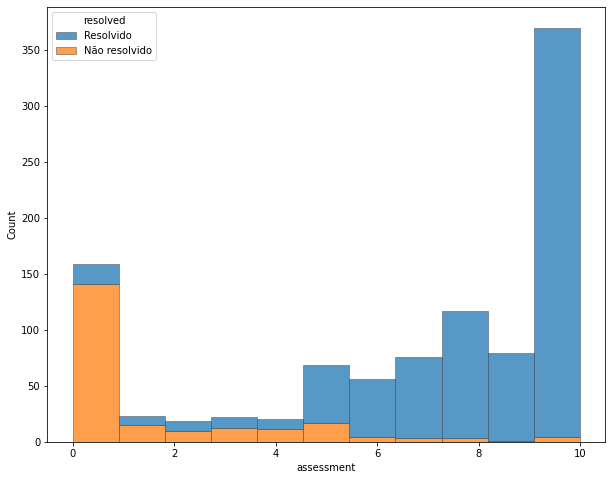

In [39]:
plt.figure(figsize=(10, 8))
sns.histplot(
    df.loc[(df['resolved'] == 'Resolvido') | (df['resolved'] == 'Não resolvido')],
    x="assessment", hue='resolved',
    bins=11,
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
)